## Working with Open-EAGGR ISEA3H in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/06_isea3h.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/06_isea3h.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/06_isea3h.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/06_isea3h.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2isea3h

In [1]:
from vgrid.conversion.latlon2dggs import latlon2isea3h

lat = 10.775276
lon = 106.706797
res = 12
isea3h_id = latlon2isea3h(lat, lon, res)
isea3h_id

'1312279,-13'

### ISEA3H to Polygon

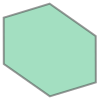

In [3]:
from vgrid.conversion.dggs2geo.isea3h2geo import isea3h2geo

isea3h_geo = isea3h2geo(isea3h_id)
isea3h_geo

### ISEA3H to GeoJSON        

In [2]:
from vgrid.conversion.dggs2geo.isea3h2geo import isea3h2geojson

isea3h_geojson = isea3h2geojson(isea3h_id)
# isea3h_geojson

### Vector to ISEA3H

Processing features: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


<Axes: >

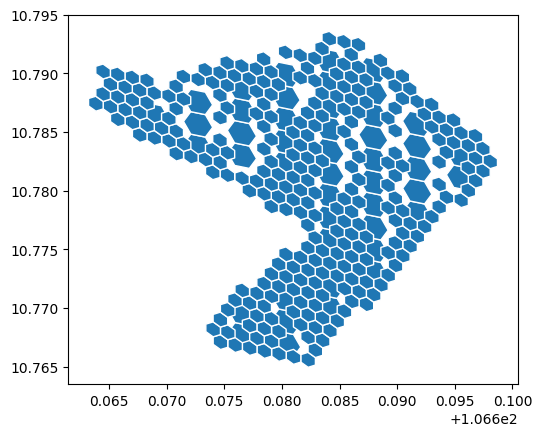

In [5]:
from vgrid.conversion.vector2dggs.vector2isea3h import vector2isea3h

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
vector_to_isea3h = vector2isea3h(
    file_path,
    resolution=20,
    compact=True,
    topology=True,
    predicate="intersects",
    output_format="gpd",
)
# vector_to_isea3h
vector_to_isea3h.plot(edgecolor="white")

### ISEA3H Compact

<Axes: >

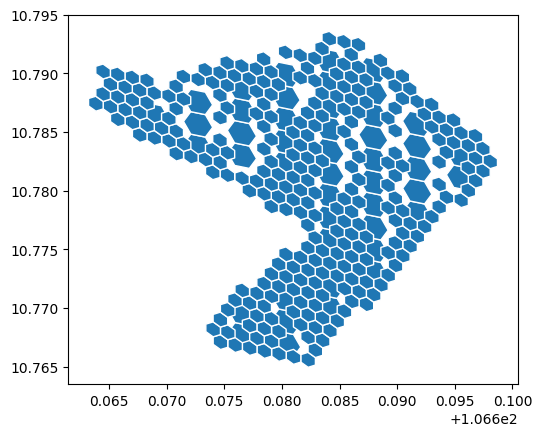

In [6]:
from vgrid.conversion.dggscompact.isea3hcompact import isea3hcompact

isea3h_compacted = isea3hcompact(vector_to_isea3h, output_format="gpd")
isea3h_compacted.plot(edgecolor="white")

### ISEA3H Expand

<Axes: >

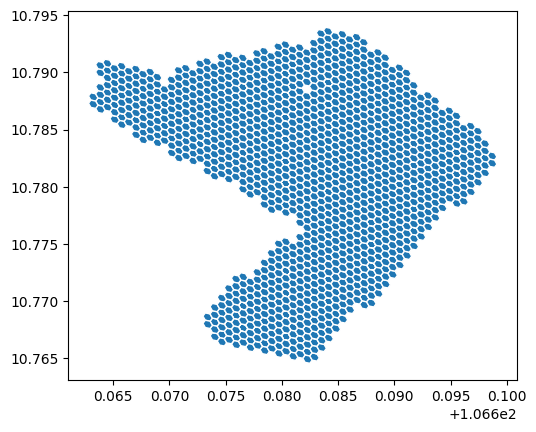

In [7]:
from vgrid.conversion.dggscompact.isea3hcompact import isea3hexpand

isea3h_expanded = isea3hexpand(vector_to_isea3h, resolution=21, output_format="gpd")
isea3h_expanded.plot(edgecolor="white")

### ISEA3H Generator

Generating ISEA3H DGGS: 100%|██████████| 140/140 [00:00<00:00, 1940.79 cells/s]


<Axes: >

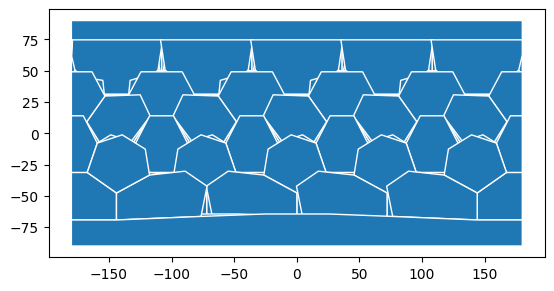

In [8]:
from vgrid.generator.isea3hgrid import isea3hgrid

isea3h_grid = isea3hgrid(resolution=1, output_format="gpd", fix_antimeridian="split")
isea3h_grid.plot(edgecolor="white")

### ISEA3H Inspect

In [9]:
from vgrid.stats.isea3hstats import isea3hinspect

resolution = 3
isea3h_inspect = isea3hinspect(resolution)
isea3h_inspect = isea3h_inspect[isea3h_inspect["crossed"] == False]
isea3h_inspect.head()

Generating ISEA3H DGGS: 100%|██████████| 2220/2220 [00:00<00:00, 6005.68 cells/s]


isea3h  resolution  center_lat  center_lon   avg_edge_len     cell_area  \
0   00030,0           3   52.796491 -144.000000  859534.472320  1.927693e+12   
1  0003-1,0           3   38.976164 -144.000000  853461.320639  1.893931e+12   
2   00030,1           3   57.699020 -121.162465  852569.447432  1.889909e+12   
3   00031,0           3   65.610319 -144.000000  854256.212533  1.895550e+12   
5  0003-1,1           3   45.137589 -128.011036  855172.453011  1.899693e+12   

   cell_perimeter                                           geometry  crossed  \
0    5.157207e+06  POLYGON ((-131.28474 52.37359, -136.05347 59.1...    False   
1    5.120768e+06  POLYGON ((-134.70124 38.65144, -138.77139 45.8...    False   
2    5.115417e+06  POLYGON ((-108 54.85114, -108 62.05445, -124.6...    False   
3    5.125537e+06  POLYGON ((-124.68962 64.8145, -131.10399 71.49...    False   
5    5.131035e+06  POLYGON ((-117.92421 43.54752, -119.12139 50.6...    False   

   norm_area       ipq       zsc  cvh  
0   1.017643  0.910791  0.952553  1.0  
1   0.999820  0.907620  0.950924  1.0  
2   0.997697  0.907588  0.950912  1.0  
3   1.000674  0.906706  0.950444  1.0  
5   1.002862  0.906741  0.950459  1.0

### ISEA3H Normalized Area Histogram

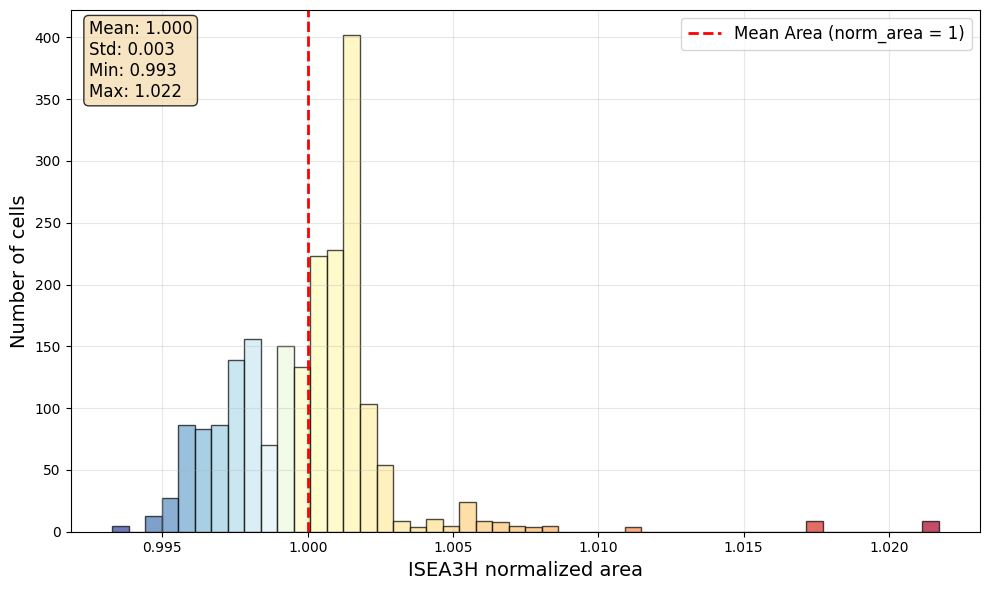

In [10]:
from vgrid.stats.isea3hstats import isea3h_norm_area_hist

isea3h_norm_area_hist(isea3h_inspect)

### Distribution of ISEA3H Area Distortions

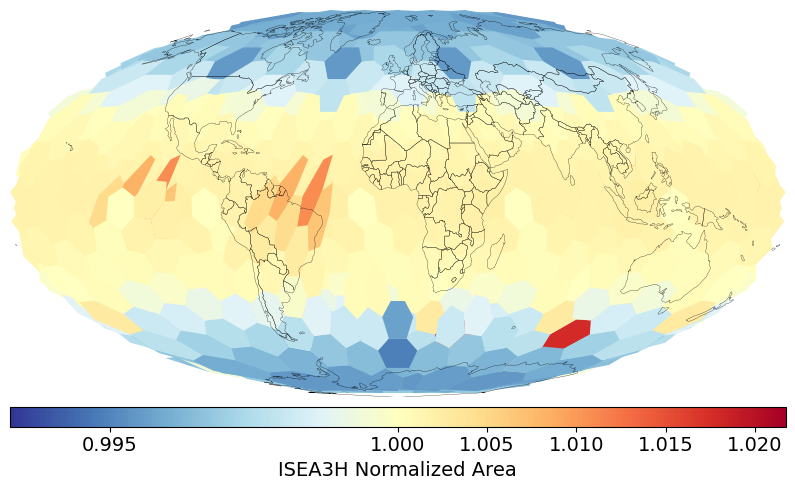

In [11]:
from vgrid.stats.isea3hstats import isea3h_norm_area

isea3h_norm_area(isea3h_inspect)

### ISEA3H IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.


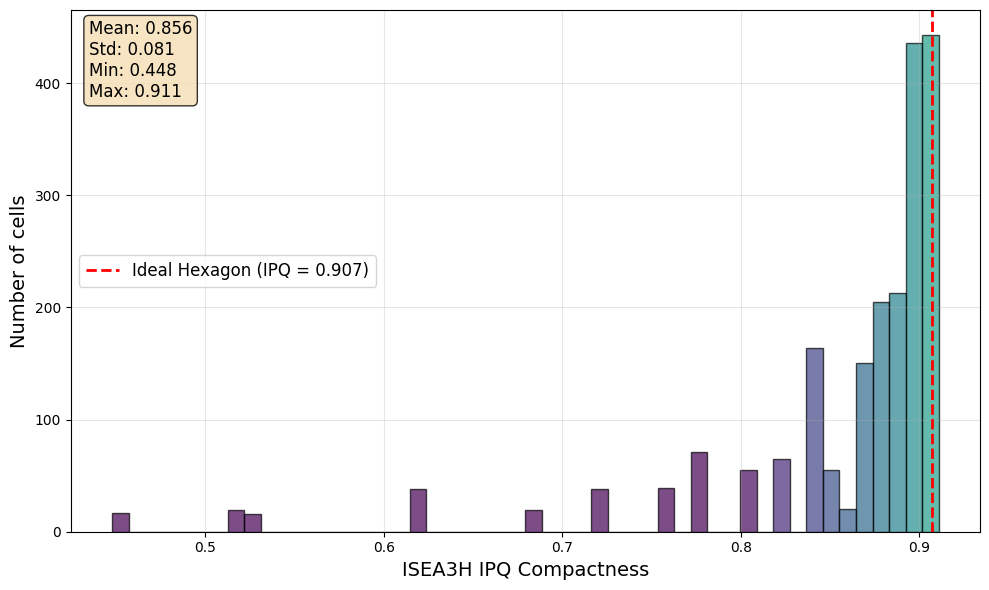

In [12]:
from vgrid.stats.isea3hstats import isea3h_compactness_ipq_hist

isea3h_compactness_ipq_hist(isea3h_inspect)

### Distribution of ISEA3H IPQ Compactness

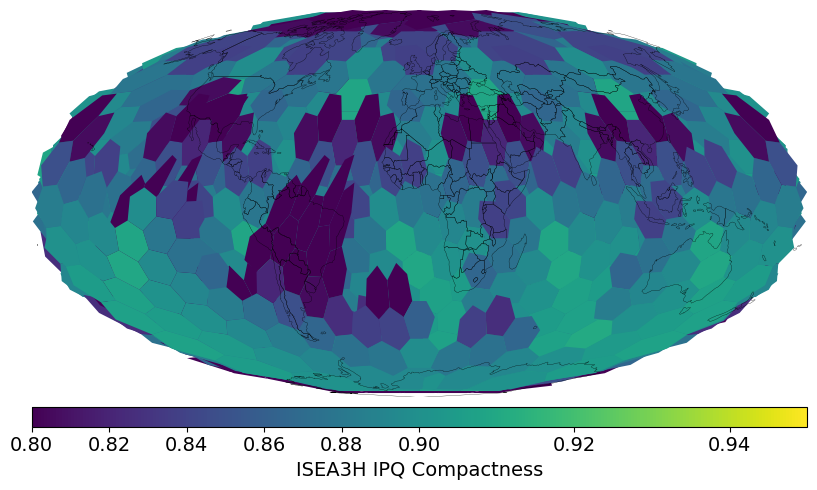

In [13]:
from vgrid.stats.isea3hstats import isea3h_compactness_ipq

isea3h_compactness_ipq(isea3h_inspect)

### ISEA3H Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

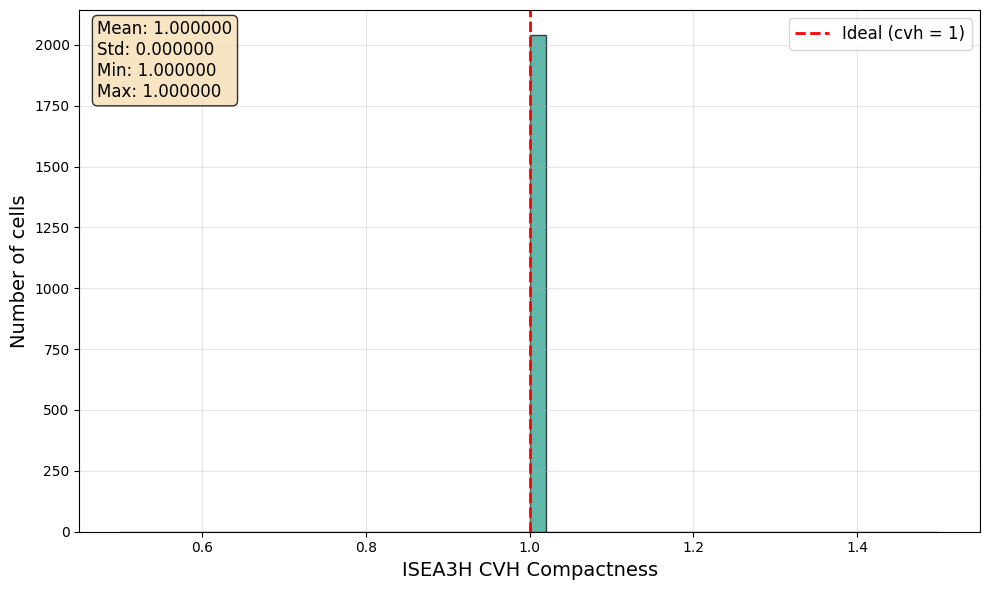

In [14]:
from vgrid.stats.isea3hstats import isea3h_compactness_cvh_hist

isea3h_compactness_cvh_hist(isea3h_inspect)

### Distribution of ISEA3H Convex hull Compactness

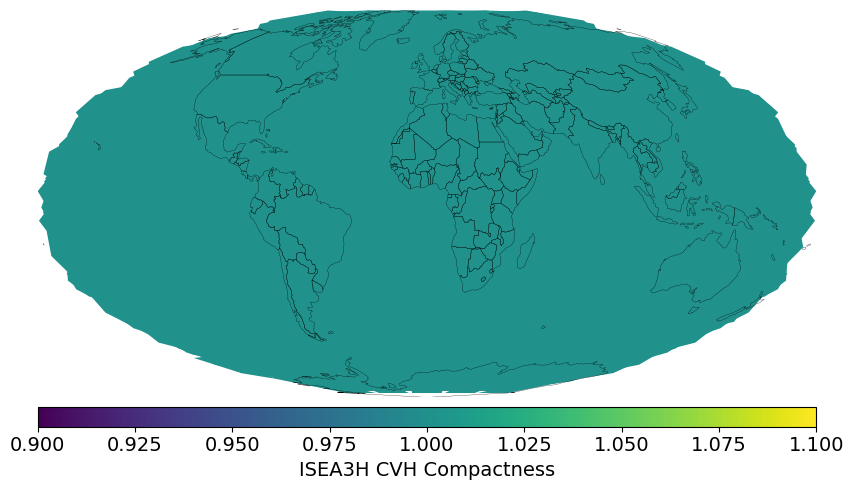

In [15]:
from vgrid.stats.isea3hstats import isea3h_compactness_cvh

isea3h_compactness_cvh(isea3h_inspect)

### ISEA3H Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [16]:
from vgrid.stats.isea3hstats import isea3hstats

isea3hstats("km")

resolution        number_of_cells  avg_edge_len_km  avg_cell_area_km2  \
0            0                     12      9907.682608       4.250547e+07   
1            1                     32      2476.920652       1.593955e+07   
2            2                     92      1460.808105       5.544192e+06   
3            3                    272       849.576775       1.875241e+06   
4            4                    812       491.710032       6.281596e+05   
5            5                   2432       284.122285       2.097309e+05   
6            6                   7292       164.083063       6.994866e+04   
7            7                  21872        94.742062       2.332048e+04   
8            8                  65612        54.701023       7.773969e+03   
9            9                 196832        31.581971       2.591375e+03   
10          10                 590492        18.233921       8.637977e+02   
11          11                1771472        10.527371       2.879332e+02   
12          12                5314412         6.077983       9.597781e+01   
13          13               15943232         3.509125       3.199261e+01   
14          14               47829692         2.025995       1.066420e+01   
15          15              143489072         1.169709       3.554735e+00   
16          16              430467212         0.675332       1.184912e+00   
17          17             1291401632         0.389903       3.949706e-01   
18          18             3874204892         0.225111       1.316569e-01   
19          19            11622614672         0.129968       4.388562e-02   
20          20            34867844012         0.075037       1.462854e-02   
21          21           104603532032         0.043323       4.876180e-03   
22          22           313810596092         0.025012       1.625393e-03   
23          23           941431788272         0.014441       5.417977e-04   
24          24          2824295364812         0.008337       1.805992e-04   
25          25          8472886094432         0.004814       6.019975e-05   
26          26         25418658283292         0.002779       2.006658e-05   
27          27         76255974849872         0.001605       6.688861e-06   
28          28        228767924549612         0.000926       2.229620e-06   
29          29        686303773648832         0.000535       7.432068e-07   
30          30       2058911320946492         0.000309       2.477356e-07   
31          31       6176733962839472         0.000178       8.257853e-08   
32          32      18530201888518412         0.000103       2.752618e-08   
33          33      55590605665555232         0.000059       9.175392e-09   
34          34     166771816996665692         0.000034       3.058464e-09   
35          35     500315450989997072         0.000020       1.019488e-09   
36          36    1500946352969991212         0.000011       3.398293e-10   
37          37    4502839058909973632         0.000007       1.132764e-10   
38          38   13508517176729920892         0.000004       3.775882e-11   
39          39   40525551530189762672         0.000002       1.258627e-11   
40          40  121576654590569288012         0.000001       4.195424e-12   

         cls_km  
0   7462.813606  
1   4528.782056  
2   2661.730568  
3   1546.144590  
4    894.497750  
5    516.792340  
6    298.438386  
7    172.316612  
8     99.489569  
9     57.440816  
10    33.163564  
11    19.147011  
12    11.054535  
13     6.382340  
14     3.684846  
15     2.127447  
16     1.228282  
17     0.709149  
18     0.409427  
19     0.236383  
20     0.136476  
21     0.078794  
22     0.045492  
23     0.026265  
24     0.015164  
25     0.008755  
26     0.005055  
27     0.002918  
28     0.001685  
29     0.000973  
30     0.000562  
31     0.000324  
32     0.000187  
33     0.000108  
34     0.000062  
35     0.000036  
36     0.000021  
37     0.000012  
38     0.000007  
39     0.000004  
40     0.000002